<a href="https://colab.research.google.com/github/sahupra1357/timeseries/blob/main/TimeseriesForcasting_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [76]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [77]:
df = pd.read_csv(csv_path)
# Slice [start:stop:step], starting from index 5 take every 6th record.
#df = df[5::6]

#date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [78]:
df.shape

(420551, 15)

In [79]:
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [80]:
df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [81]:
df.head(10)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
35,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
41,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
47,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
53,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2
59,1000.27,-7.04,266.10,-8.17,91.6,3.60,3.30,0.30,2.05,3.29,1307.76,1.45,3.00,292.6


In [82]:
df.shape

(70091, 14)

In [83]:
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

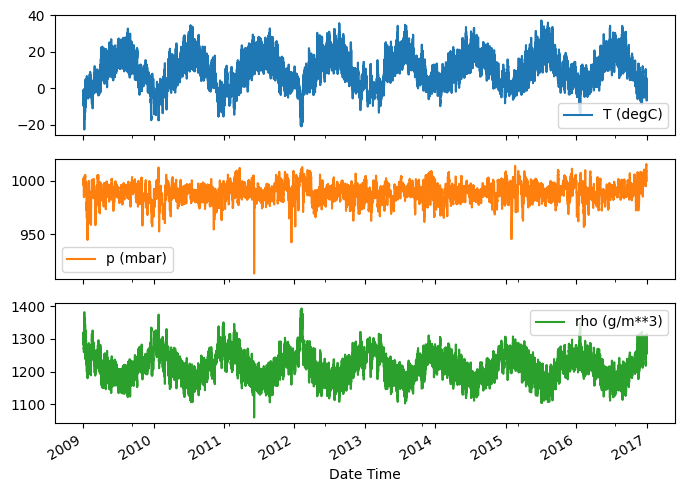

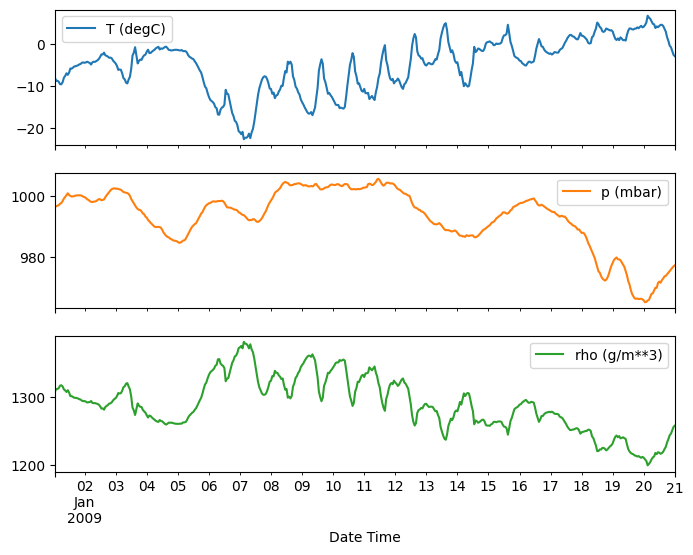

In [84]:
plot_colums = ['T (degC)','p (mbar)','rho (g/m**3)']
plot_feature = df[plot_colums]
plot_feature.index = date_time

_ = plot_feature.plot(subplots=True)

plot_colums = ['T (degC)','p (mbar)','rho (g/m**3)']
plot_feature = df[plot_colums][:480]
plot_feature.index = date_time[:480]

_ = plot_feature.plot(subplots=True)

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [86]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.00
wv[bad_wv] = 0.0

wv_m = df['max. wv (m/s)']
bad_wv_m = wv_m == -9999.00
wv_m[bad_wv_m] = 0.0

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


Text(0, 0.5, 'Wind speed in m/s')

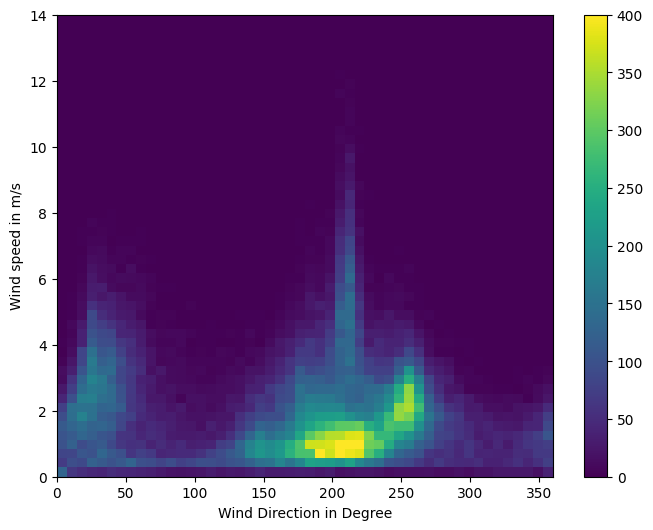

In [88]:
plt.hist2d(df['wd (deg)'],df['wv (m/s)'], bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction in Degree')
plt.ylabel('Wind speed in m/s')
#plt.show()

In [89]:
wv = df.pop('wv (m/s)')
wv_m = df.pop('max. wv (m/s)')

wd_rad = df.pop('wd (deg)')*np.pi/180


df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

df['WxM'] = wv_m*np.cos(wd_rad)
df['WyM'] = wv_m*np.sin(wd_rad)


(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

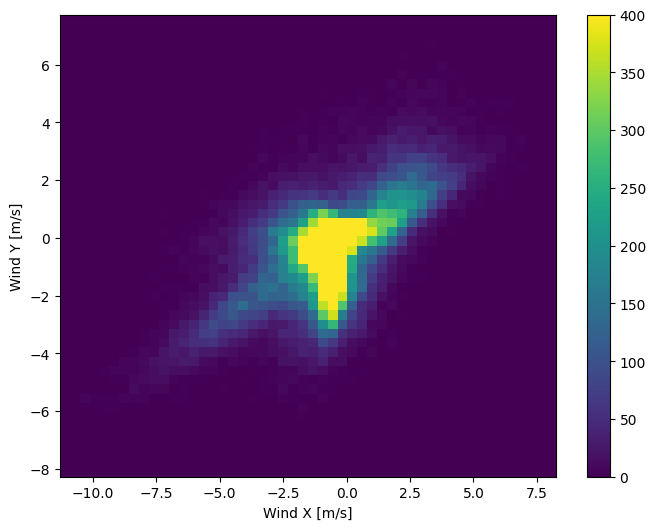

In [90]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [91]:
date_time[:5]

5    2009-01-01 01:00:00
11   2009-01-01 02:00:00
17   2009-01-01 03:00:00
23   2009-01-01 04:00:00
29   2009-01-01 05:00:00
Name: Date Time, dtype: datetime64[ns]

In [92]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s[:5]

5     1.230772e+09
11    1.230775e+09
17    1.230779e+09
23    1.230782e+09
29    1.230786e+09
Name: Date Time, dtype: float64

In [93]:
list(timestamp_s[:5])

[1230771600.0, 1230775200.0, 1230778800.0, 1230782400.0, 1230786000.0]

In [94]:
day = 24*60*60
year = 365.2425*day

df['D_sin'] = np.sin(timestamp_s * (2*np.pi/day))
df['D_cos'] = np.cos(timestamp_s * (2*np.pi/day))
df['Y_sin'] = np.sin(timestamp_s * (2*np.pi/year))
df['Y_cos'] = np.cos(timestamp_s * (2*np.pi/year))

In [95]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,WxM,WyM,D_sin,D_cos,Y_sin,Y_cos
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,0.258819,0.965926,0.010049,0.999950
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645,0.500000,0.866025,0.010766,0.999942
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576,0.707107,0.707107,0.011483,0.999934
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603,-0.190000,-0.329090,0.866025,0.500000,0.012199,0.999926
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292,-0.810044,0.343843,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,-0.855154,-0.160038,-1.336792,-0.250174,-0.953717,0.300706,0.006900,0.999976
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,-0.716196,-0.726267,-1.348134,-1.367090,-0.843391,0.537300,0.007617,0.999971
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,-0.661501,0.257908,-1.453438,0.566672,-0.675590,0.737277,0.008334,0.999965
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,-0.280621,-0.209169,-0.545207,-0.406385,-0.461749,0.887011,0.009050,0.999959


Text(0.5, 1.0, 'Time of day signal')

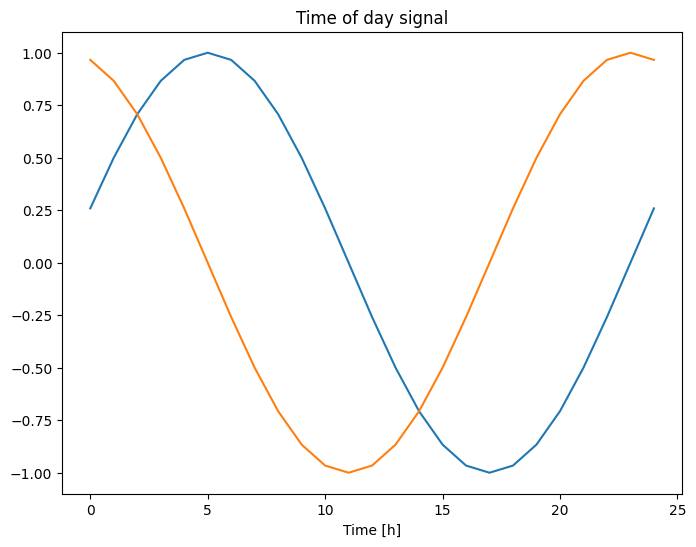

In [96]:
plt.plot(np.array(df['D_sin'])[:25])
plt.plot(np.array(df['D_cos'])[:25])
plt.xlabel("Time [h]")
plt.title("Time of day signal")

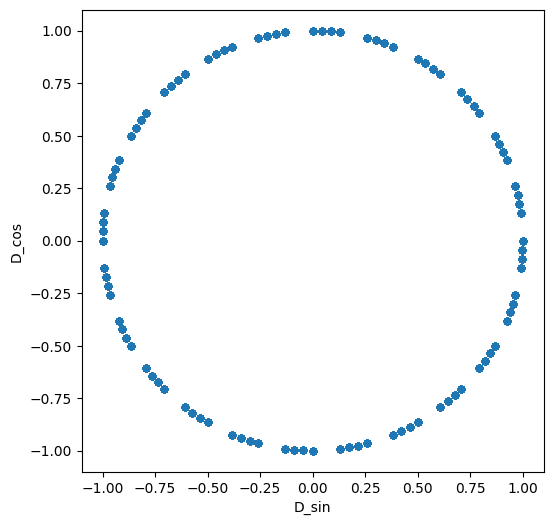

In [97]:
df.plot.scatter('D_sin','D_cos').set_aspect('equal');

In [98]:
fft = tf.signal.rfft(df['T (degC)'])
fft

<tf.Tensor: shape=(35046,), dtype=complex64, numpy=
array([ 6.6239369e+05+0.0000000e+00j, -4.6668330e+03+3.7410137e+04j,
       -2.7058491e+03+1.2410740e+04j, ..., -2.9588785e+01+2.2237301e+01j,
        2.2038443e+01-3.7979412e+01j,  6.8314880e+01+2.2538704e+01j],
      dtype=complex64)>

In [99]:
f_per_dataset = np.arange(0,len(fft))
f_per_dataset

array([    0,     1,     2, ..., 35043, 35044, 35045])

In [100]:
len(df['T (degC)'])

70091

In [101]:
n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

In [102]:
years_per_dataset

7.995726608047841

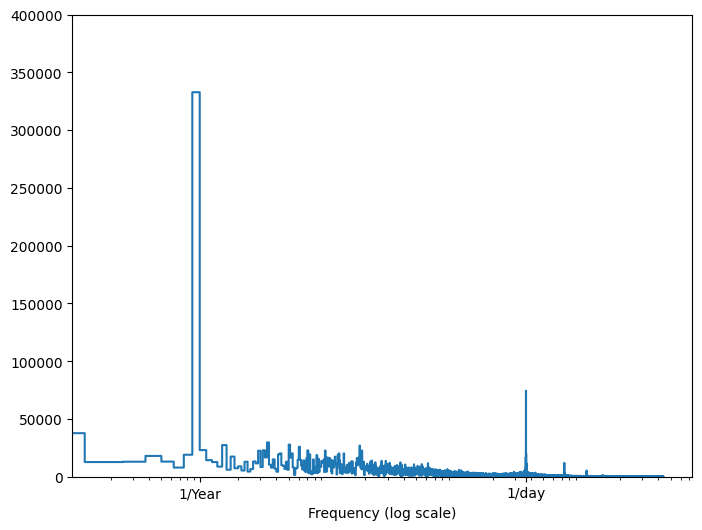

In [103]:
f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [104]:
colum_indices = {name: i for i, name in enumerate(df.columns)}
colum_indices

{'p (mbar)': 0,
 'T (degC)': 1,
 'Tpot (K)': 2,
 'Tdew (degC)': 3,
 'rh (%)': 4,
 'VPmax (mbar)': 5,
 'VPact (mbar)': 6,
 'VPdef (mbar)': 7,
 'sh (g/kg)': 8,
 'H2OC (mmol/mol)': 9,
 'rho (g/m**3)': 10,
 'Wx': 11,
 'Wy': 12,
 'WxM': 13,
 'WyM': 14,
 'D_sin': 15,
 'D_cos': 16,
 'Y_sin': 17,
 'Y_cos': 18}

In [105]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [106]:
num_features

19

In [107]:
train_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,WxM,WyM,D_sin,D_cos,Y_sin,Y_cos
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,0.258819,0.965926,0.010049,0.999950
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645,0.500000,0.866025,0.010766,0.999942
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576,0.707107,0.707107,0.011483,0.999934
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603,-0.190000,-0.329090,0.866025,0.500000,0.012199,0.999926
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292,-0.810044,0.343843,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294353,990.06,16.94,290.93,15.56,91.6,19.33,17.71,1.62,11.20,17.89,1180.85,-0.929778,-2.746910,-1.449171,-4.281390,-0.675590,0.737277,-0.546227,-0.837637
294359,990.87,16.72,290.64,14.40,86.2,19.07,16.43,2.63,10.38,16.59,1183.30,-2.254649,-1.392500,-3.165017,-1.954755,-0.461749,0.887011,-0.546827,-0.837245
294365,990.46,15.52,289.47,14.54,93.9,17.66,16.58,1.08,10.48,16.74,1187.66,-0.656072,0.616092,-0.918500,0.862529,-0.216440,0.976296,-0.547427,-0.836853
294371,990.43,15.26,289.21,14.45,94.9,17.37,16.48,0.89,10.42,16.64,1188.74,-0.565397,-0.551748,-1.259619,-1.229211,0.043619,0.999048,-0.548027,-0.836461


In [108]:
train_mean = train_df.mean()
train_mean

p (mbar)            988.656343
T (degC)              9.108207
Tpot (K)            283.194958
Tdew (degC)           4.599605
rh (%)               75.906008
VPmax (mbar)         13.355098
VPact (mbar)          9.356960
VPdef (mbar)          3.998056
sh (g/kg)             5.913550
H2OC (mmol/mol)       9.466371
rho (g/m**3)       1216.994357
Wx                   -0.594182
Wy                   -0.391513
WxM                  -0.962159
WyM                  -0.709401
D_sin                -0.000054
D_cos                -0.000072
Y_sin                 0.052824
Y_cos                -0.016243
dtype: float64

In [109]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [110]:
train_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,WxM,WyM,D_sin,D_cos,Y_sin,Y_cos
5,0.945308,-1.982473,-2.041888,-1.918973,1.117102,-1.302851,-1.477323,-0.790424,-1.480036,-1.482697,2.218524,0.193409,0.221161,0.111140,0.217928,0.366111,1.366069,-0.061052,1.428434
11,0.959770,-2.078372,-2.138166,-2.060964,1.044617,-1.330143,-1.534354,-0.786272,-1.536190,-1.539035,2.325708,0.172987,0.222101,0.109458,0.227798,0.707200,1.224794,-0.060029,1.428424
17,0.986284,-2.070284,-2.132435,-2.045187,1.062738,-1.328843,-1.527225,-0.788348,-1.528703,-1.531992,2.323998,0.207983,0.276266,0.111218,0.324078,1.000100,1.000059,-0.059006,1.428412
23,1.004362,-2.098014,-2.161090,-2.096820,1.008375,-1.336641,-1.546235,-0.782121,-1.547420,-1.553119,2.358913,0.270343,0.195267,0.246907,0.145176,1.224850,0.707179,-0.057983,1.428400
29,1.061006,-2.165028,-2.232152,-2.187178,0.984214,-1.353535,-1.579503,-0.782121,-1.581113,-1.585982,2.446320,0.112264,0.350818,0.048640,0.402053,1.366133,0.366112,-0.056960,1.428388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294353,0.169167,0.904892,0.886564,1.571997,0.947972,0.776492,1.984916,-0.493604,1.979016,1.977352,-0.882480,-0.166720,-1.508412,-0.155728,-1.363530,-0.955374,1.042725,-0.855026,-1.154613
294359,0.266787,0.879473,0.853325,1.405624,0.621793,0.742703,1.680752,-0.283962,1.672043,1.672192,-0.822662,-0.824901,-0.641039,-0.704391,-0.475387,-0.652949,1.254471,-0.855883,-1.154062
294365,0.217374,0.740824,0.719224,1.425703,1.086900,0.559461,1.716396,-0.605690,1.709479,1.707403,-0.716211,-0.030746,0.645277,0.013960,0.600050,-0.306022,1.380734,-0.856739,-1.153511
294371,0.213759,0.710783,0.689423,1.412795,1.147303,0.521772,1.692633,-0.645127,1.687018,1.683929,-0.689842,0.014300,-0.102616,-0.095117,-0.198426,0.061765,1.412909,-0.857595,-1.152959


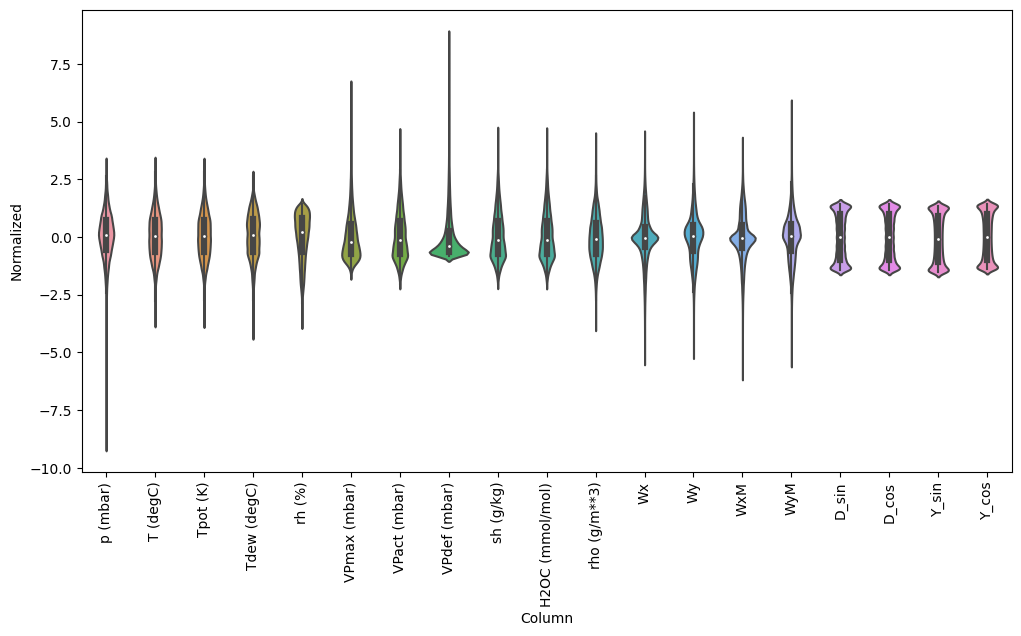

In [111]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [112]:
x = np.array([1,2,3,4,5,6,7])
y = x + np.expand_dims(x, axis=0).T
y

array([[ 2,  3,  4,  5,  6,  7,  8],
       [ 3,  4,  5,  6,  7,  8,  9],
       [ 4,  5,  6,  7,  8,  9, 10],
       [ 5,  6,  7,  8,  9, 10, 11],
       [ 6,  7,  8,  9, 10, 11, 12],
       [ 7,  8,  9, 10, 11, 12, 13],
       [ 8,  9, 10, 11, 12, 13, 14]])

In [113]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df,label_columns=None):

    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    self.label_columns = label_columns
    if label_columns is not None:
      self.label_column_indices = {name:i for i, name in enumerate(label_columns)}
    self.colum_indices = {name:i for i, name in enumerate(train_df.columns)}

    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.label_slice = slice(self.label_start,None)
    self.label_indices = np.arange(self.total_window_size)[self.label_slice]

  def __repr__(self):
    return '\n'.join([f'Total window size: {self.total_window_size}',
                      f'Input indices: {self.input_indices}',
                      f'Label indices: {self.label_indices}',
                      f'Label column names(s): {self.label_columns}'])


In [114]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column names(s): ['T (degC)']

In [115]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column names(s): ['T (degC)']

In [116]:
def split_window(self, features):
  inputs = features[:,self.input_slice,:]
  labels = features[:,self.label_slice,:]

  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:,:, self.colum_indices[name]] for name in self.label_columns], axis=-1
    )
  inputs.set_shape([None,self.input_width,None])
  labels.set_shape([None,self.label_width,None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [117]:
train_df[:w2.total_window_size]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,WxM,WyM,D_sin,D_cos,Y_sin,Y_cos
5,0.945308,-1.982473,-2.041888,-1.918973,1.117102,-1.302851,-1.477323,-0.790424,-1.480036,-1.482697,2.218524,0.193409,0.221161,0.111140,0.217928,0.366111,1.366069,-0.061052,1.428434
11,0.959770,-2.078372,-2.138166,-2.060964,1.044617,-1.330143,-1.534354,-0.786272,-1.536190,-1.539035,2.325708,0.172987,0.222101,0.109458,0.227798,0.707200,1.224794,-0.060029,1.428424
17,0.986284,-2.070284,-2.132435,-2.045187,1.062738,-1.328843,-1.527225,-0.788348,-1.528703,-1.531992,2.323998,0.207983,0.276266,0.111218,0.324078,1.000100,1.000059,-0.059006,1.428412
23,1.004362,-2.098014,-2.161090,-2.096820,1.008375,-1.336641,-1.546235,-0.782121,-1.547420,-1.553119,2.358913,0.270343,0.195267,0.246907,0.145176,1.224850,0.707179,-0.057983,1.428400
29,1.061006,-2.165028,-2.232152,-2.187178,0.984214,-1.353535,-1.579503,-0.782121,-1.581113,-1.585982,2.446320,0.112264,0.350818,0.048640,0.402053,1.366133,0.366112,-0.056960,1.428388
35,1.091135,-2.169649,-2.239029,-2.182875,1.014416,-1.354835,-1.579503,-0.786272,-1.581113,-1.583635,2.459016,0.274590,0.268633,0.175115,0.377528,1.414323,0.000102,-0.055937,1.428374
41,1.165857,-2.111879,-2.186305,-2.108294,1.026496,-1.340539,-1.550988,-0.784197,-1.554908,-1.557814,2.416777,1.308822,-0.008002,1.211039,0.057261,1.366133,-0.365907,-0.054914,1.428360


In [118]:
train_df[100:100+w2.total_window_size]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,WxM,WyM,D_sin,D_cos,Y_sin,Y_cos
605,-0.371962,-1.256877,-1.222380,-1.154516,0.742600,-1.039035,-1.099495,-0.699095,-1.094449,-1.095378,1.117876,-0.008101,-1.858711,-0.012834,-1.793552,1.366133,0.366112,0.041125,1.423813
611,-0.323755,-1.255721,-1.225819,-1.158819,0.724479,-1.037735,-1.101871,-0.694943,-1.098193,-1.097726,1.129351,0.236194,-0.925165,0.232757,-1.111988,1.414323,0.000102,0.042144,1.423731
617,-0.224929,-1.292695,-1.269373,-1.207584,0.718439,-1.054630,-1.130386,-0.697019,-1.124398,-1.128242,1.193076,0.929816,0.199257,1.226761,0.201768,1.366133,-0.365907,0.043164,1.423647
623,-0.118873,-1.366641,-1.351897,-1.286468,0.748640,-1.085820,-1.175536,-0.709473,-1.173064,-1.172842,1.296353,1.085074,0.252860,1.426828,0.273597,1.224850,-0.706974,0.044183,1.423563
629,-0.028484,-1.411702,-1.403474,-1.283599,0.917770,-1.105314,-1.173159,-0.740608,-1.169321,-1.172842,1.364716,-0.497435,0.112580,-1.159488,0.033991,1.000100,-0.999854,0.045203,1.423478
635,0.069136,-1.432499,-1.430982,-1.312284,0.905689,-1.113111,-1.189793,-0.738532,-1.188038,-1.189274,1.411838,1.543241,0.442288,1.777778,0.479760,0.707200,-1.224590,0.046222,1.423393
641,0.158320,-1.460229,-1.465367,-1.392602,0.772802,-1.124807,-1.232566,-0.719851,-1.229218,-1.233874,1.464819,2.736996,1.020389,2.755284,0.985252,0.366111,-1.365864,0.047241,1.423307


In [119]:
train_df[200:200+w2.total_window_size]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,WxM,WyM,D_sin,D_cos,Y_sin,Y_cos
1205,1.767245,-2.921820,-3.032175,-3.219839,0.658035,-1.512085,-1.869409,-0.782121,-1.865623,-1.872364,3.475186,-0.154728,0.590998,-0.381836,0.753717,1.000100,-0.999854,0.142703,1.411997
1211,1.831120,-2.812056,-2.927874,-3.077848,0.682196,-1.493891,-1.838518,-0.780045,-1.835675,-1.841848,3.368979,-0.063299,0.595178,-0.140999,0.670027,0.707200,-1.224590,0.143714,1.411843
1217,1.833531,-2.541691,-2.660818,-2.790998,0.549309,-1.441907,-1.767229,-0.759289,-1.768291,-1.773773,3.068181,-0.065114,-0.020679,-0.037440,0.030058,0.366111,-1.365864,0.144725,1.411688
1223,1.761219,-2.262082,-2.377715,-2.558649,0.241251,-1.378227,-1.703070,-0.715700,-1.704650,-1.708046,2.743456,-0.116517,0.491472,-0.274743,0.586186,0.000077,-1.414050,0.145736,1.411532
1229,1.703370,-1.795297,-1.911226,-2.314826,-0.548827,-1.245669,-1.624653,-0.570403,-1.629779,-1.632930,2.232441,0.011226,0.014826,-0.130452,-0.066262,-0.365957,-1.365864,0.146746,1.411376
1235,1.629854,-1.619675,-1.731278,-2.276102,-0.913664,-1.184589,-1.610395,-0.485301,-1.614805,-1.618846,2.031257,-0.178915,0.002563,-0.284876,-0.016433,-0.707046,-1.224590,0.147757,1.411219
1241,1.622623,-1.478715,-1.591446,-2.134111,-0.961986,-1.131305,-1.560493,-0.443788,-1.566138,-1.569551,1.883056,-0.172852,-0.046153,-0.160000,-0.003914,-0.999946,-0.999854,0.148767,1.411061


In [120]:
train_df[200:201]

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,WxM,WyM,D_sin,D_cos,Y_sin,Y_cos
1205,1.767245,-2.92182,-3.032175,-3.219839,0.658035,-1.512085,-1.869409,-0.782121,-1.865623,-1.872364,3.475186,-0.154728,0.590998,-0.381836,0.753717,1.0001,-0.999854,0.142703,1.411997


In [121]:
example_window1 = tf.stack([np.array(train_df[:w2.total_window_size])])#,
                           #np.array(train_df[100:100+w2.total_window_size]),
                           #np.array(train_df[200:200+w2.total_window_size])])

example_window1

<tf.Tensor: shape=(1, 7, 19), dtype=float64, numpy=
array([[[ 9.45307599e-01, -1.98247323e+00, -2.04188844e+00,
         -1.91897277e+00,  1.11710152e+00, -1.30285119e+00,
         -1.47732321e+00, -7.90423621e-01, -1.48003637e+00,
         -1.48269721e+00,  2.21852381e+00,  1.93409239e-01,
          2.21161294e-01,  1.11140455e-01,  2.17927873e-01,
          3.66110559e-01,  1.36606880e+00, -6.10523600e-02,
          1.42843408e+00],
        [ 9.59769847e-01, -2.07837211e+00, -2.13816632e+00,
         -2.06096373e+00,  1.04461734e+00, -1.33014257e+00,
         -1.53435391e+00, -7.86272298e-01, -1.53618981e+00,
         -1.53903452e+00,  2.32570755e+00,  1.72986774e-01,
          2.22100866e-01,  1.09458245e-01,  2.27798499e-01,
          7.07199726e-01,  1.22479437e+00, -6.00293506e-02,
          1.42842359e+00],
        [ 9.86283967e-01, -2.07028426e+00, -2.13243549e+00,
         -2.04518696e+00,  1.06273839e+00, -1.32884298e+00,
         -1.52722507e+00, -7.88347960e-01, -1.52870268

In [122]:
example_window1[:,6,:]

<tf.Tensor: shape=(1, 19), dtype=float64, numpy=
array([[ 1.16585687, -2.11187895, -2.18630526, -2.10829405,  1.0264963 ,
        -1.34053929, -1.55098787, -0.78419664, -1.55490762, -1.55781362,
         2.41677711,  1.30882225, -0.00800171,  1.2110392 ,  0.05726148,
         1.3661334 , -0.36590717, -0.05491443,  1.42836033]])>

In [123]:
example_inputs1, example_labels1 = w2.split_window(example_window1)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window1.shape}')
print(f'Inputs shape: {example_inputs1.shape}')
print(f'Labels shape: {example_labels1.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 7, 19)
Inputs shape: (1, 6, 19)
Labels shape: (1, 1, 1)


In [124]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

In [125]:
example_inputs, example_labels = w2.split_window(example_window)

In [126]:
len(example_inputs)

3

In [127]:
w2.example = example_inputs, example_labels

In [128]:
w2.example

(<tf.Tensor: shape=(3, 6, 19), dtype=float64, numpy=
 array([[[ 9.45307599e-01, -1.98247323e+00, -2.04188844e+00,
          -1.91897277e+00,  1.11710152e+00, -1.30285119e+00,
          -1.47732321e+00, -7.90423621e-01, -1.48003637e+00,
          -1.48269721e+00,  2.21852381e+00,  1.93409239e-01,
           2.21161294e-01,  1.11140455e-01,  2.17927873e-01,
           3.66110559e-01,  1.36606880e+00, -6.10523600e-02,
           1.42843408e+00],
         [ 9.59769847e-01, -2.07837211e+00, -2.13816632e+00,
          -2.06096373e+00,  1.04461734e+00, -1.33014257e+00,
          -1.53435391e+00, -7.86272298e-01, -1.53618981e+00,
          -1.53903452e+00,  2.32570755e+00,  1.72986774e-01,
           2.22100866e-01,  1.09458245e-01,  2.27798499e-01,
           7.07199726e-01,  1.22479437e+00, -6.00293506e-02,
           1.42842359e+00],
         [ 9.86283967e-01, -2.07028426e+00, -2.13243549e+00,
          -2.04518696e+00,  1.06273839e+00, -1.32884298e+00,
          -1.52722507e+00, -7.8834796

In [129]:
class a():
  def __str__(self):
    return "This is a test class"

In [130]:
a.abcd = example_inputs, example_labels

In [131]:
a.abcd

(<tf.Tensor: shape=(3, 6, 19), dtype=float64, numpy=
 array([[[ 9.45307599e-01, -1.98247323e+00, -2.04188844e+00,
          -1.91897277e+00,  1.11710152e+00, -1.30285119e+00,
          -1.47732321e+00, -7.90423621e-01, -1.48003637e+00,
          -1.48269721e+00,  2.21852381e+00,  1.93409239e-01,
           2.21161294e-01,  1.11140455e-01,  2.17927873e-01,
           3.66110559e-01,  1.36606880e+00, -6.10523600e-02,
           1.42843408e+00],
         [ 9.59769847e-01, -2.07837211e+00, -2.13816632e+00,
          -2.06096373e+00,  1.04461734e+00, -1.33014257e+00,
          -1.53435391e+00, -7.86272298e-01, -1.53618981e+00,
          -1.53903452e+00,  2.32570755e+00,  1.72986774e-01,
           2.22100866e-01,  1.09458245e-01,  2.27798499e-01,
           7.07199726e-01,  1.22479437e+00, -6.00293506e-02,
           1.42842359e+00],
         [ 9.86283967e-01, -2.07028426e+00, -2.13243549e+00,
          -2.04518696e+00,  1.06273839e+00, -1.32884298e+00,
          -1.52722507e+00, -7.8834796

In [132]:
a.abcd[1]

<tf.Tensor: shape=(3, 1, 1), dtype=float64, numpy=
array([[[-2.11187895]],

       [[-1.46022873]],

       [[-1.47871527]]])>

In [133]:
def plot_data(self, model=None, plot_col='T (degC)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12,8))
  plot_col_index = self.colum_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n,1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n,:, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_column_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n,:, label_col_index],  edgecolors='k', label='Labels', c='#2ca02c', s=64)

    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n,:, label_col_index],  marker = 'X', edgecolors='k', label='Labels', c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

    plt.xlabel('Time [h]')


WindowGenerator.plot_data = plot_data

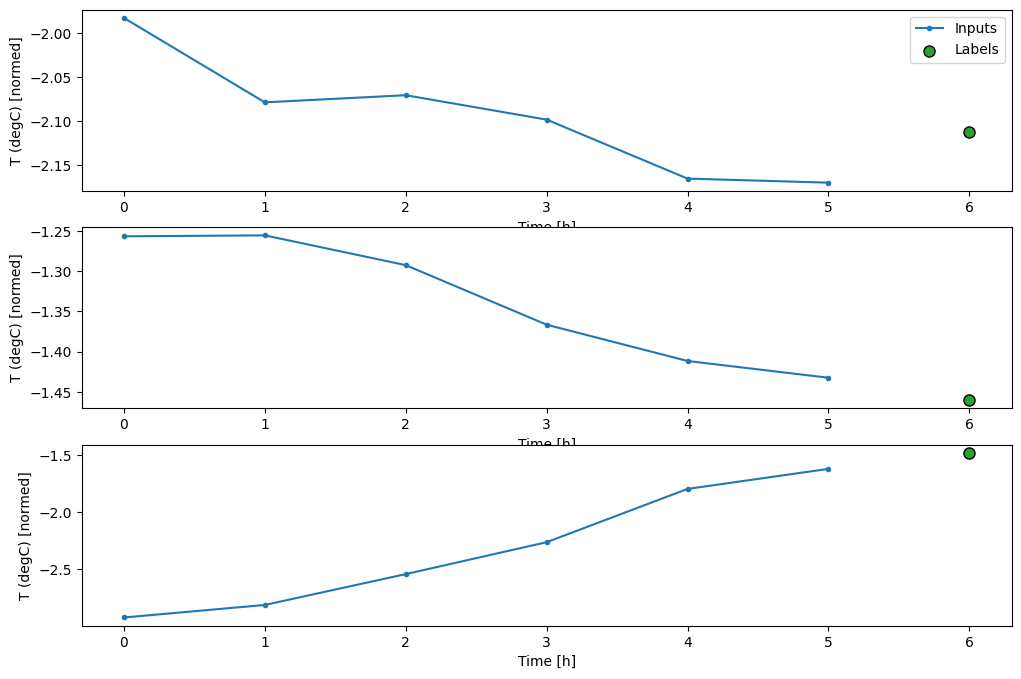

In [134]:
w2.plot_data()

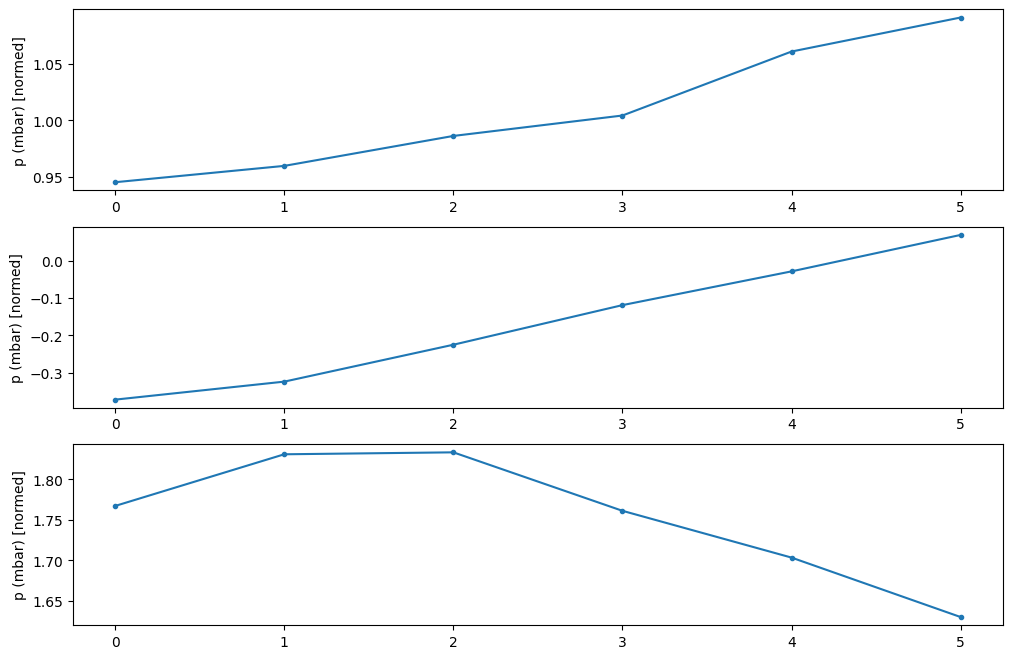

In [135]:
w2.plot_data(plot_col='p (mbar)')

In [136]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset


In [137]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [138]:
w2.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [139]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [140]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column names(s): ['T (degC)']

In [141]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


## Baseline model - based on previos day

In [142]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index
  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:,:,self.label_index]
    return result[:,:,tf.newaxis]

In [143]:
baseline = Baseline(label_index=colum_indices['T (degC)'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 3s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0785


In [144]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column names(s): ['T (degC)']

In [145]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


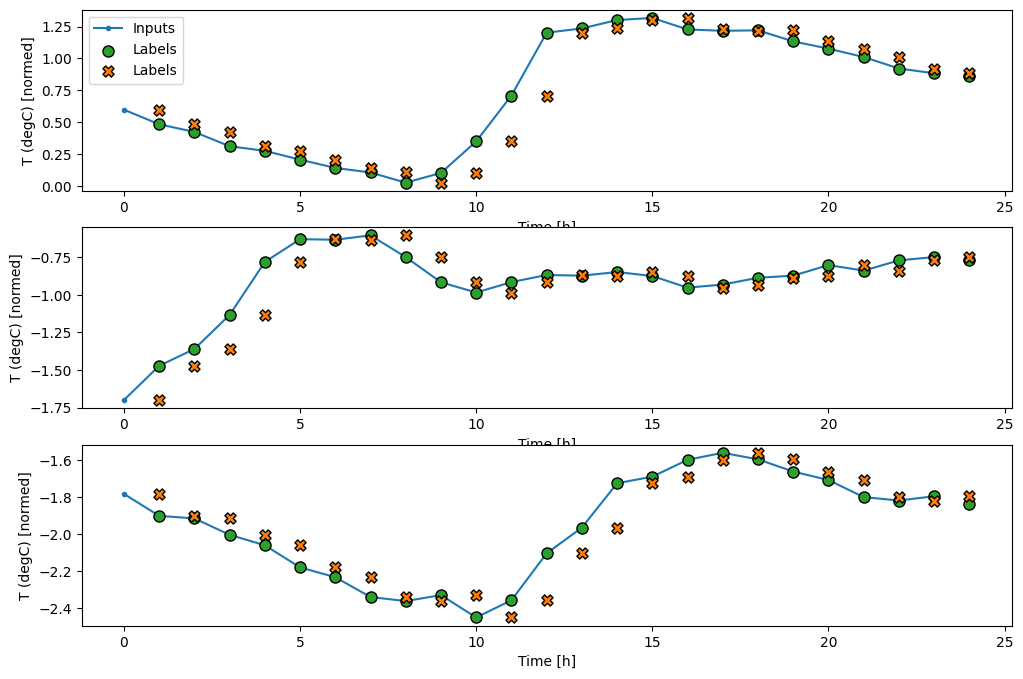

In [146]:
wide_window.plot_data(baseline)

## Linear Model

In [147]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [148]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


In [149]:
linear.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (32, 1, 1)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [151]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 9s 6ms/step - loss: 0.1867 - mean_absolute_error: 0.2492 - val_loss: 0.0141 - val_mean_absolute_error: 0.0896
Epoch 2/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0808 - val_loss: 0.0104 - val_mean_absolute_error: 0.0763
Epoch 3/20
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0099 - mean_absolute_error: 0.0732 - val_loss: 0.0092 - val_mean_absolute_error: 0.0713
Epoch 4/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0707 - val_loss: 0.0089 - val_mean_absolute_error: 0.0698
Epoch 5/20
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0700 - val_loss: 0.0088 - val_mean_absolute_error: 0.0699
Epoch 6/20
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0698 - val_loss: 0.0089 - val_mean_absolute_error: 0.0702
Epoc

In [175]:
print('Input shape:', wide_window.example[0].shape)
print('Input shape:', wide_window.example[1].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Input shape: (32, 24, 1)
Output shape: (32, 24, 1)


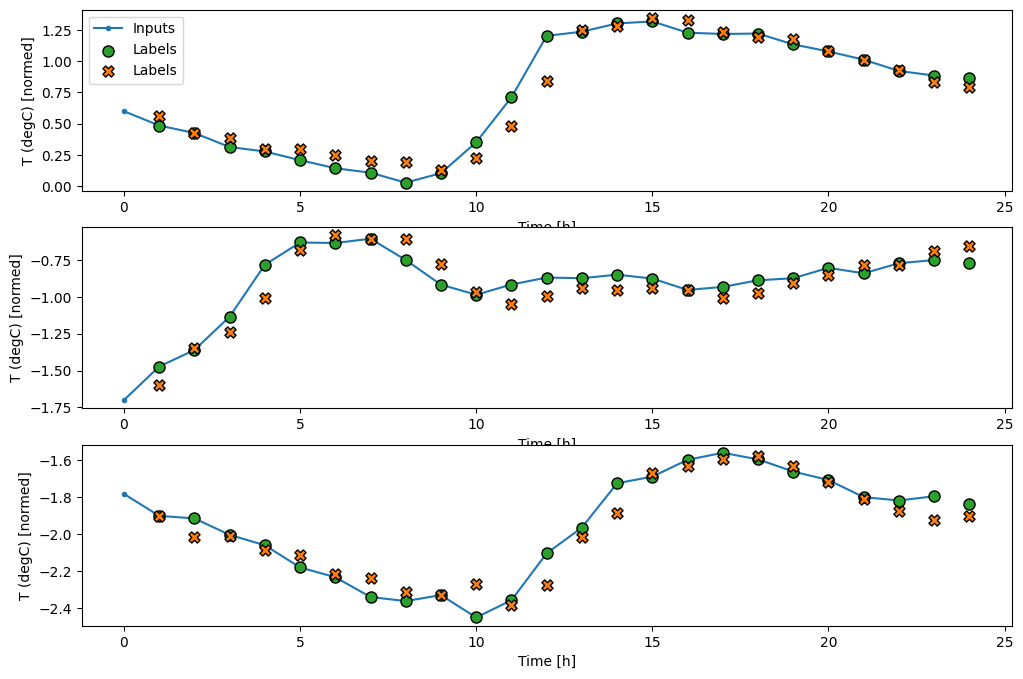

In [153]:
wide_window.plot_data(linear)

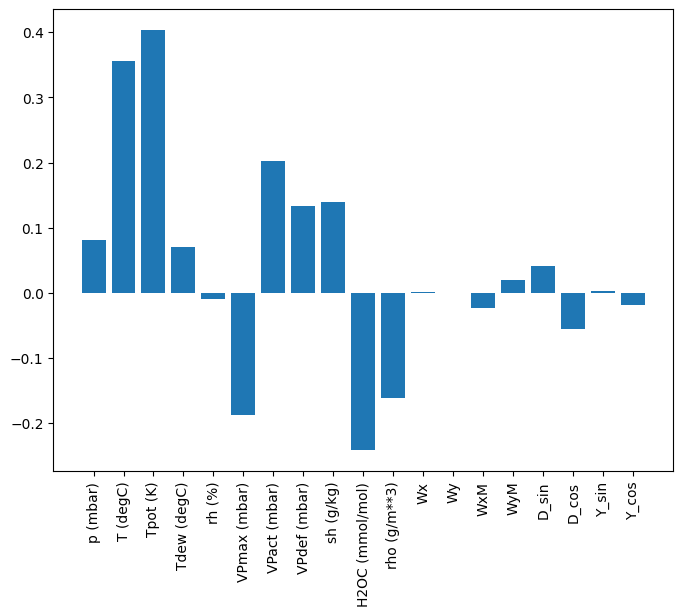

In [154]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Danse Model

In [155]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 10s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0783 - val_loss: 0.0088 - val_mean_absolute_error: 0.0695
Epoch 2/20
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0648 - val_loss: 0.0083 - val_mean_absolute_error: 0.0668
Epoch 3/20
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0624 - val_loss: 0.0091 - val_mean_absolute_error: 0.0712
Epoch 4/20
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0611 - val_loss: 0.0069 - val_mean_absolute_error: 0.0588
Epoch 5/20
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0596 - val_loss: 0.0070 - val_mean_absolute_error: 0.0594
Epoch 6/20
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0594 - val_loss: 0.0068 - val_mean_absolute_error: 0.0583
Epo

In [156]:
dense.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1, 64)             1280      
                                                                 
 dense_3 (Dense)             (None, 1, 64)             4160      
                                                                 
 dense_4 (Dense)             (None, 1, 1)              65        
                                                                 
Total params: 5505 (21.50 KB)
Trainable params: 5505 (21.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', dense(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


In [158]:
dense1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
history1 = compile_and_fit(dense1, single_step_window)

Epoch 1/20
1534/1534 [==============================] - 10s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0807 - val_loss: 0.0081 - val_mean_absolute_error: 0.0650
Epoch 2/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0646 - val_loss: 0.0076 - val_mean_absolute_error: 0.0629
Epoch 3/20
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0623 - val_loss: 0.0075 - val_mean_absolute_error: 0.0636
Epoch 4/20
1534/1534 [==============================] - 7s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0611 - val_loss: 0.0068 - val_mean_absolute_error: 0.0578
Epoch 5/20
1534/1534 [==============================] - 9s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0601 - val_loss: 0.0067 - val_mean_absolute_error: 0.0578
Epoch 6/20
1534/1534 [==============================] - 8s 5ms/step - loss: 0.0069 - mean_absolute_error: 0.0591 - val_loss: 0.0077 - val_mean_absolute_error: 0.0646
Epo

In [159]:
dense1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 19)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                1280      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5505 (21.50 KB)
Trainable params: 5505 (21.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', dense1(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1)


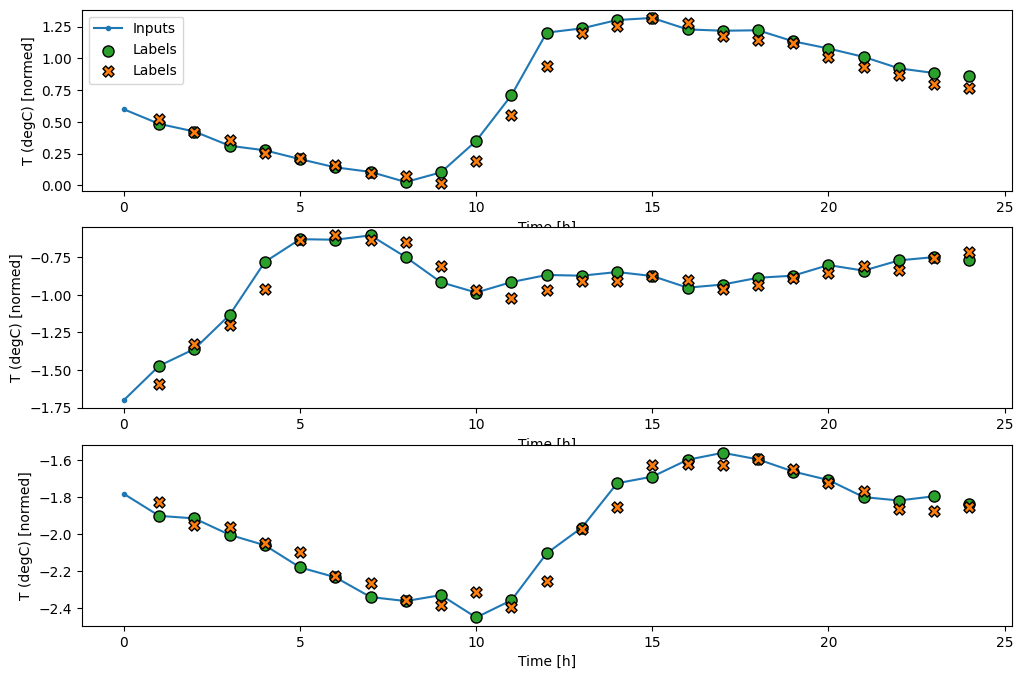

In [161]:
wide_window.plot_data(dense)

##Multistep Dense

In [162]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column names(s): ['T (degC)']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

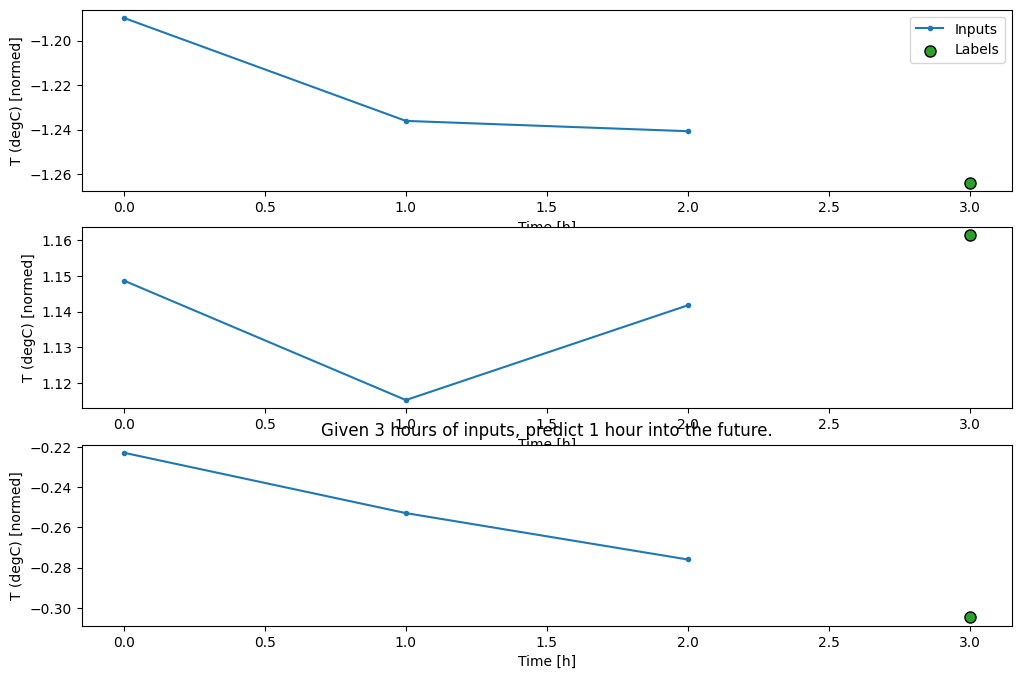

In [163]:
conv_window.plot_data()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [164]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [165]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [166]:
multi_step_dense.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (32, 57)                  0         
                                                                 
 dense_8 (Dense)             (32, 32)                  1856      
                                                                 
 dense_9 (Dense)             (32, 32)                  1056      
                                                                 
 dense_10 (Dense)            (32, 1)                   33        
                                                                 
 reshape (Reshape)           (32, 1, 1)                0         
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [167]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 2s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0663


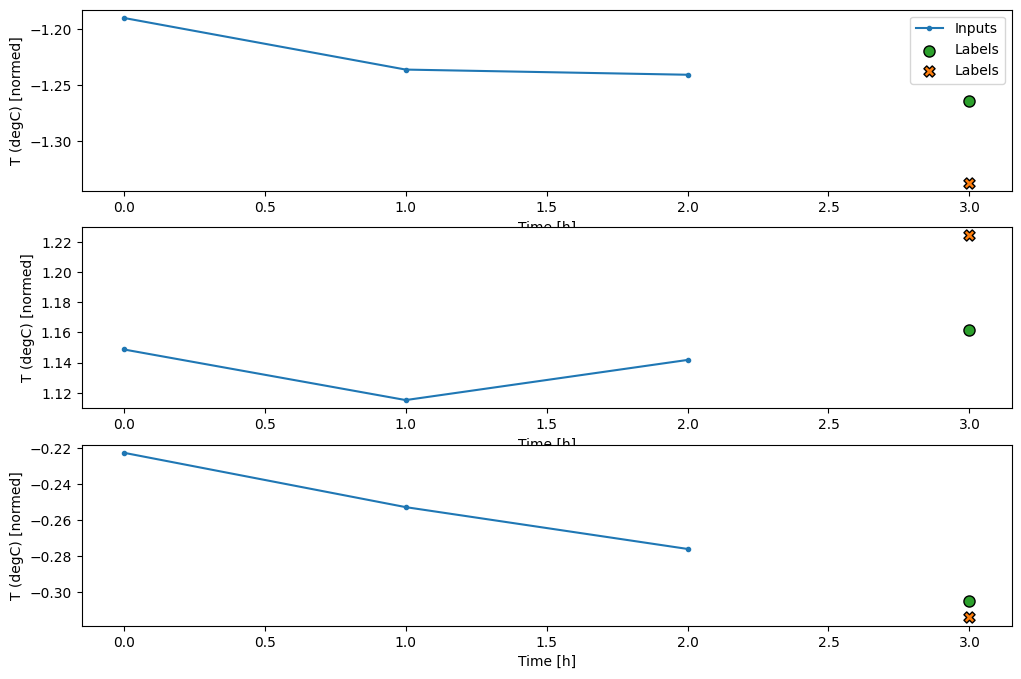

In [168]:
conv_window.plot_data(multi_step_dense)

In [169]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 19)

ValueError:Exception encountered when calling layer 'sequential_4' (type Sequential).

Input 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 57, but received input with shape (32, 456)

Call arguments received by layer 'sequential_4' (type Sequential):
  • inputs=tf.Tensor(shape=(32, 24, 19), dtype=float32)
  • training=None
  • mask=None


##Convolution Model

In [170]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [171]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 19)
Output shape: (32, 1, 1)


In [172]:
conv_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (32, 1, 32)               1856      
                                                                 
 dense_11 (Dense)            (32, 1, 32)               1056      
                                                                 
 dense_12 (Dense)            (32, 1, 1)                33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [173]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

438/438 [==============================] - 2s 3ms/step - loss: 0.0069 - mean_absolute_error: 0.0595


In [174]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [176]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['T (degC)'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column names(s): ['T (degC)']

In [178]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 19)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


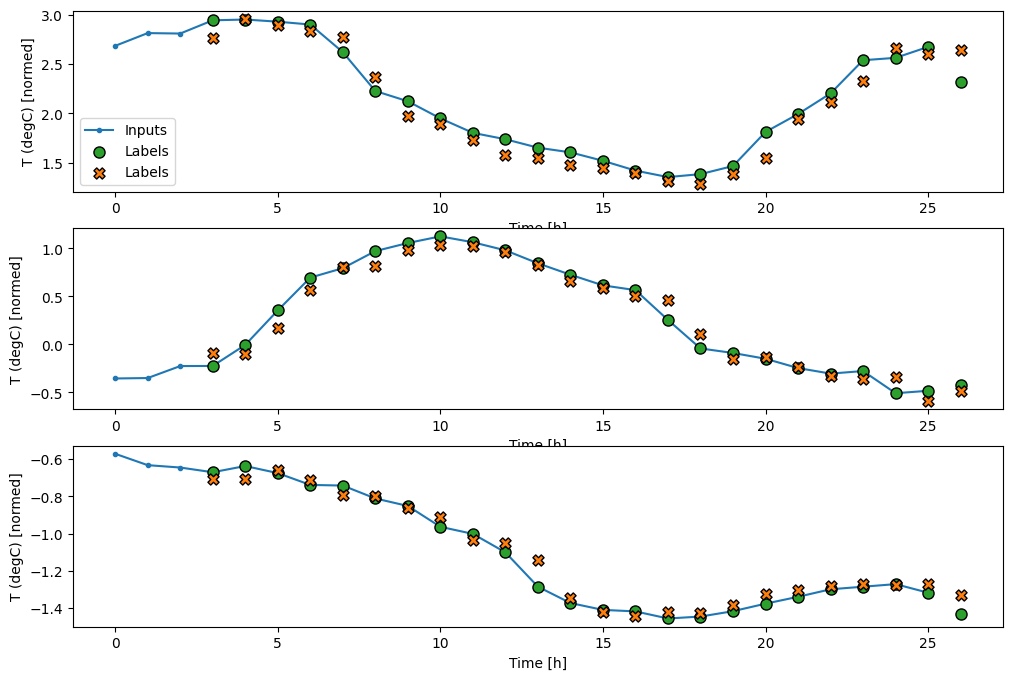

In [179]:
wide_conv_window.plot_data(conv_model)

##RNN (LSTM) model

In [180]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [181]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


In [182]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 3s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0524


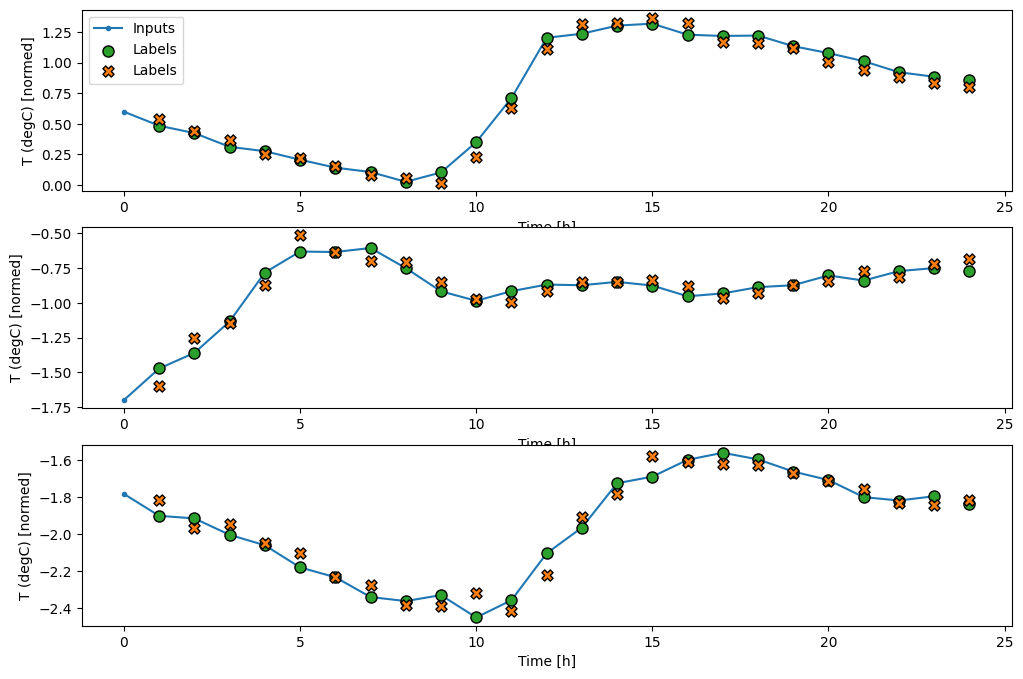

In [184]:
wide_window.plot_data(lstm_model)

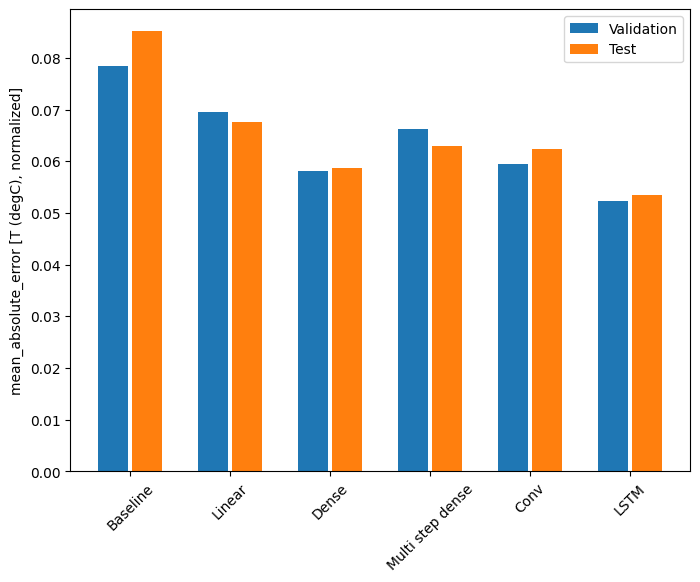

In [185]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [186]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0852
Linear      : 0.0676
Dense       : 0.0587
Multi step dense: 0.0630
Conv        : 0.0625
LSTM        : 0.0534


In [187]:
w3 = WindowGenerator(input_width=6, label_width=1, shift=1)
w3

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column names(s): None

In [188]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 19)
Labels shape (batch, time, features): (32, 24, 19)


In [191]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 19)


In [189]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [190]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

438/438 [==============================] - 4s 7ms/step - loss: 0.0886 - mean_absolute_error: 0.1589


In [192]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [193]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 2s 3ms/step - loss: 0.0694 - mean_absolute_error: 0.1330


In [194]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

438/438 [==============================] - 4s 10ms/step - loss: 0.0617 - mean_absolute_error: 0.1205

CPU times: user 7min 59s, sys: 29.8 s, total: 8min 29s
Wall time: 8min 1s


In [195]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [196]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

438/438 [==============================] - 4s 10ms/step - loss: 0.0623 - mean_absolute_error: 0.1180

CPU times: user 4min 30s, sys: 17.1 s, total: 4min 47s
Wall time: 4min 17s


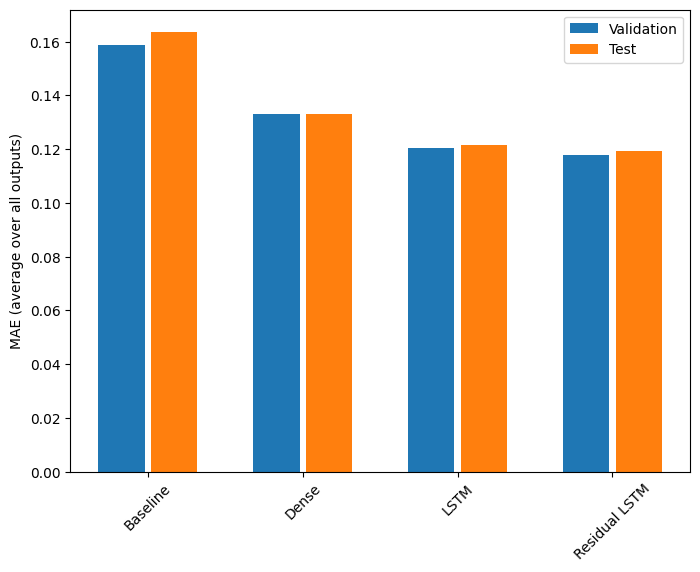

In [197]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [198]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1638
Dense          : 0.1331
LSTM           : 0.1217
Residual LSTM  : 0.1192


Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column names(s): None

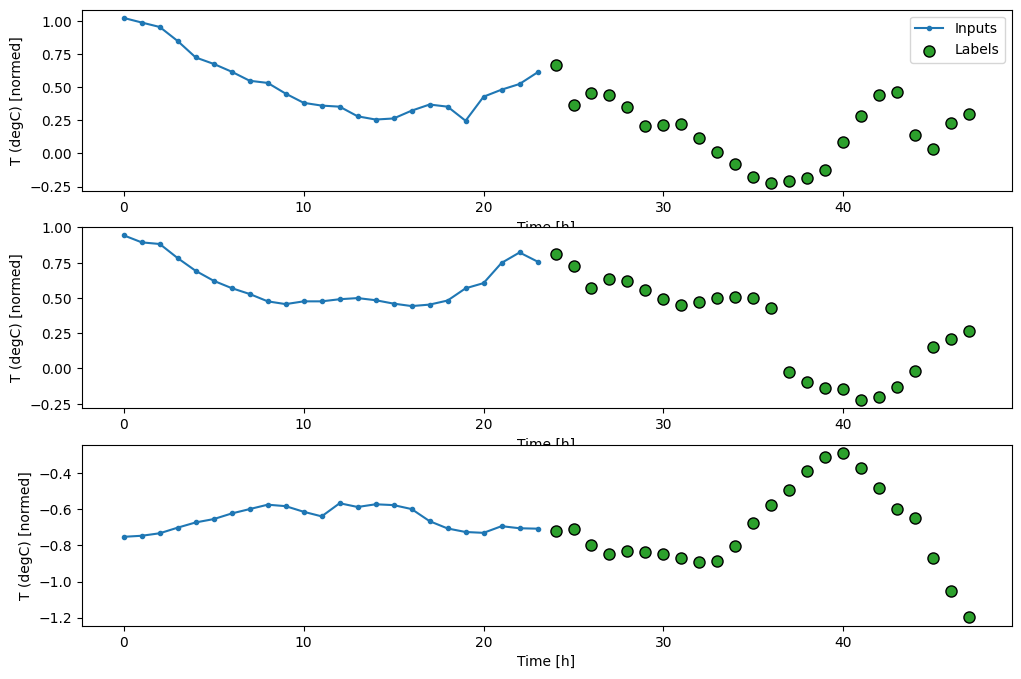

In [200]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot_data()
multi_window

437/437 [==============================] - 2s 5ms/step - loss: 0.6285 - mean_absolute_error: 0.5007


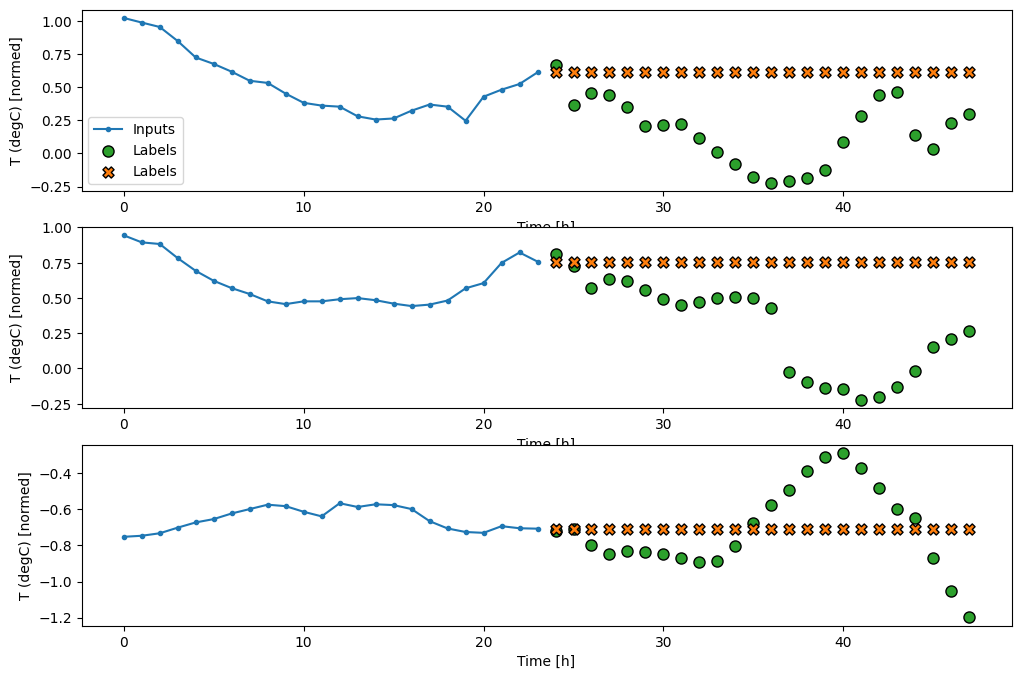

In [202]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot_data(last_baseline)

437/437 [==============================] - 4s 8ms/step - loss: 0.4270 - mean_absolute_error: 0.3959


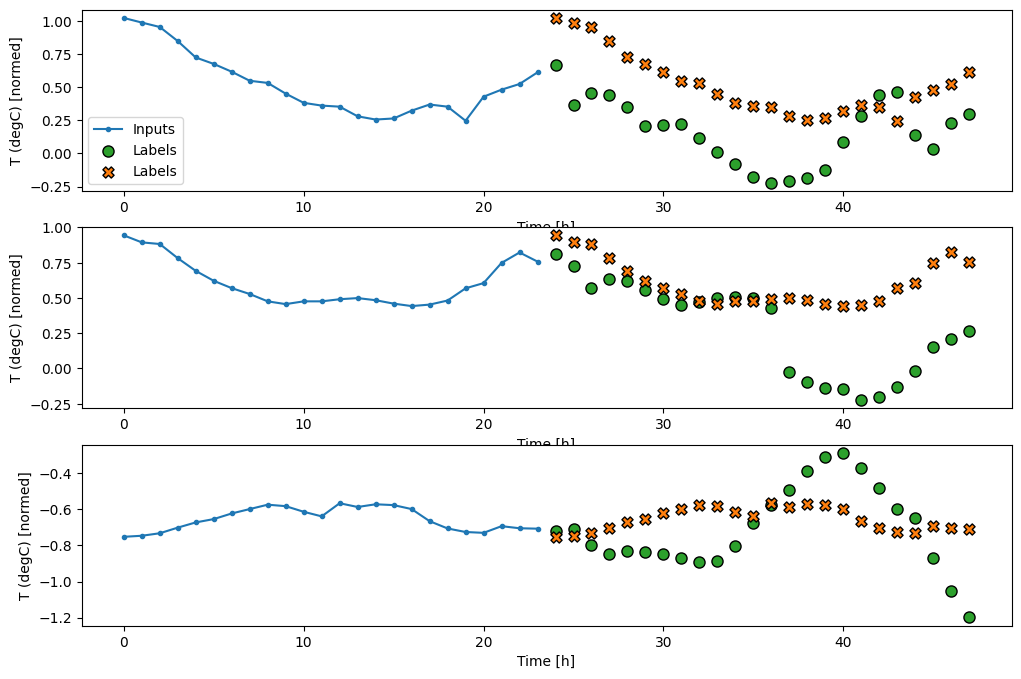

In [204]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot_data(repeat_baseline)

437/437 [==============================] - 2s 4ms/step - loss: 0.2557 - mean_absolute_error: 0.3047


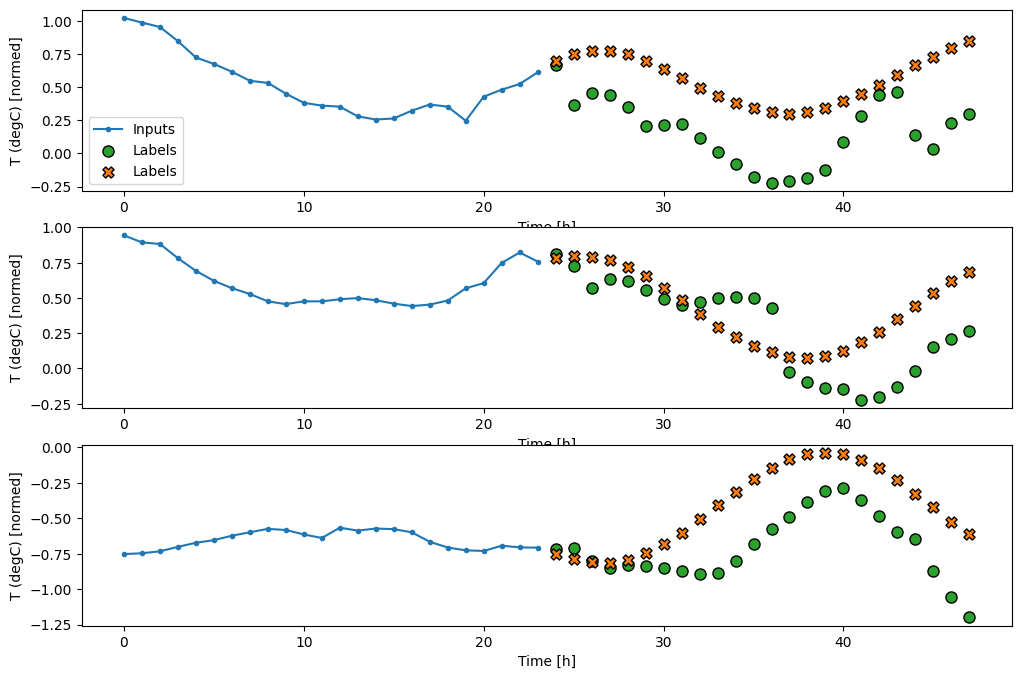

In [206]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot_data(multi_linear_model)

437/437 [==============================] - 2s 5ms/step - loss: 0.2207 - mean_absolute_error: 0.2812


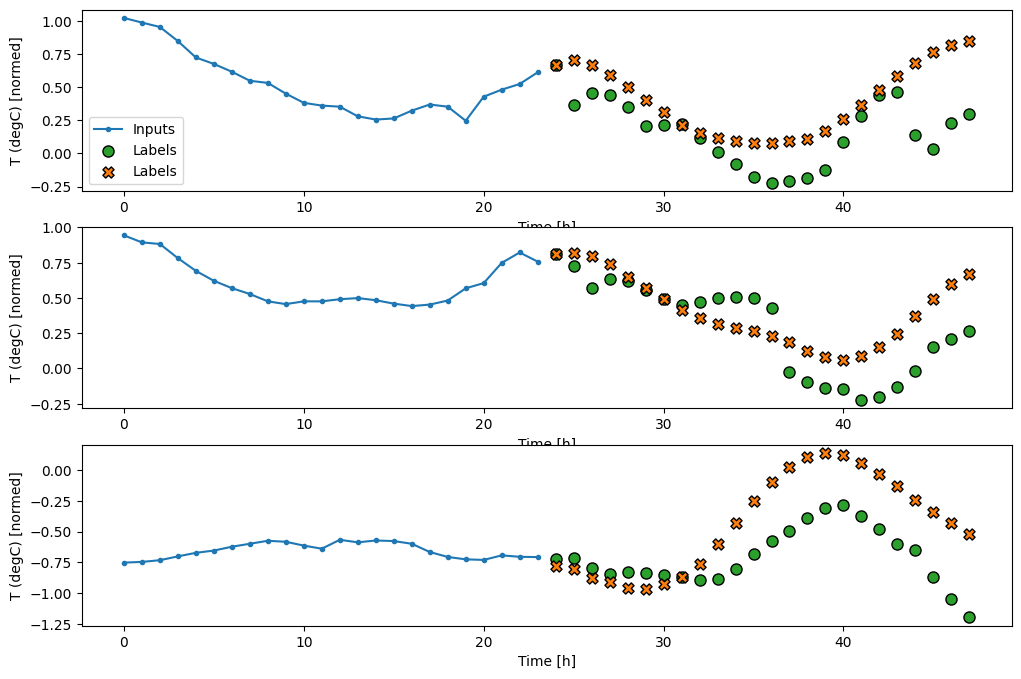

In [207]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot_data(multi_dense_model)

437/437 [==============================] - 2s 4ms/step - loss: 0.2128 - mean_absolute_error: 0.2797


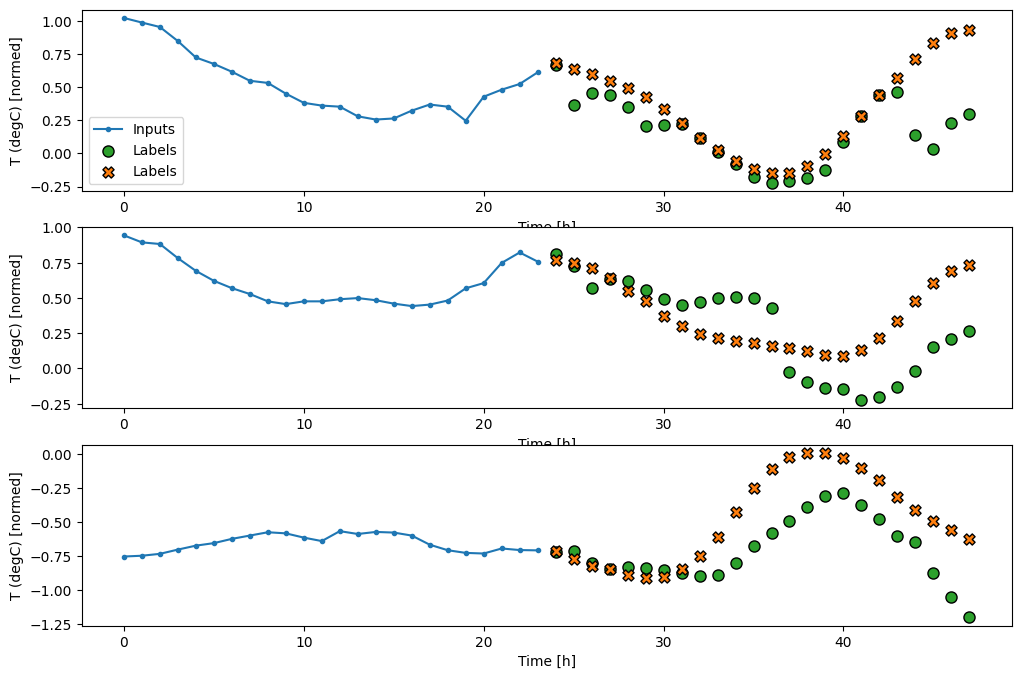

In [208]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot_data(multi_conv_model)

437/437 [==============================] - 4s 8ms/step - loss: 0.2148 - mean_absolute_error: 0.2846


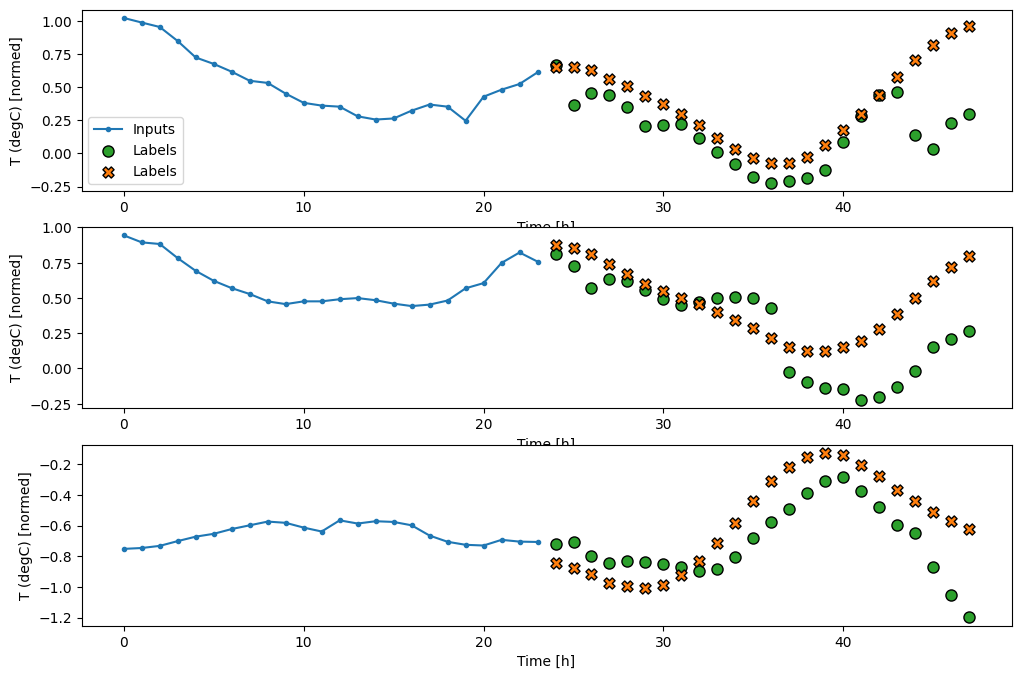

In [209]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot_data(multi_lstm_model)

In [210]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [211]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [212]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [213]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 19])

In [214]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [215]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 19)


437/437 [==============================] - 4s 9ms/step - loss: 0.2307 - mean_absolute_error: 0.3009


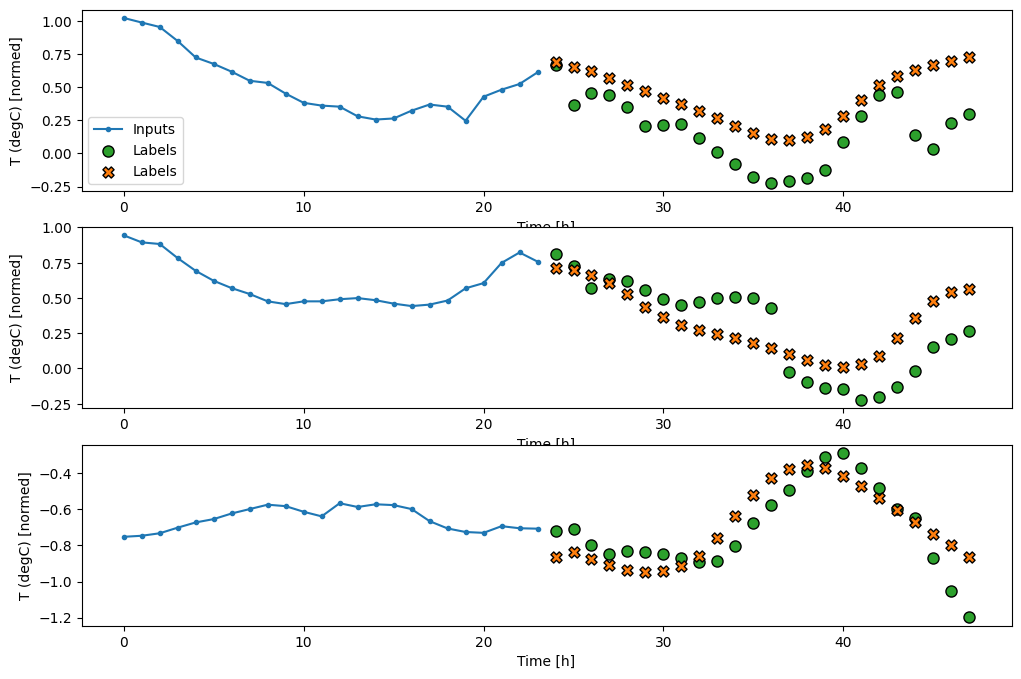

In [217]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot_data(feedback_model)

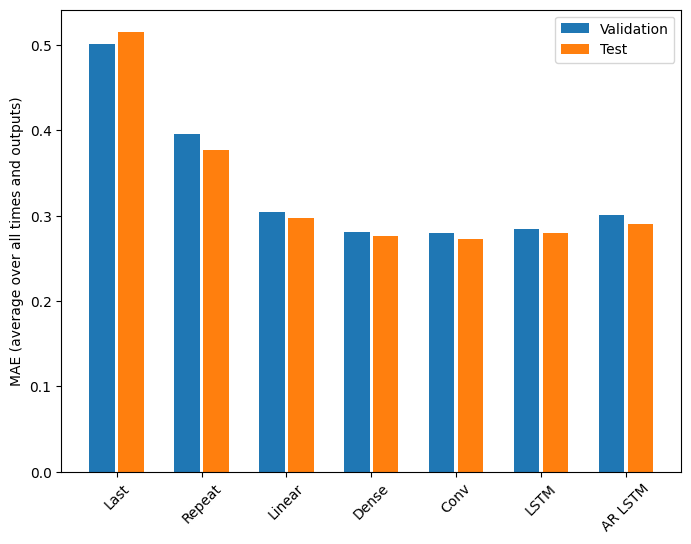

In [218]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [219]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.5157
Repeat  : 0.3774
Linear  : 0.2972
Dense   : 0.2767
Conv    : 0.2728
LSTM    : 0.2791
AR LSTM : 0.2903
